## Loading and Preprocessing Dataset
Intially Loaded the Dataset.
# Preprocessing the Dataset
Initially applied resizing technique.Then applied Cropping of images and then applied Min-Max Normalization to the above cropped Images.
After applying the normalization technique on cropped images,we then saved the images in a folder named preprocessed images
This is the link of Preprocessed images






https://drive.google.com/drive/folders/1GHjda1zgsK0K67QMTJM3FIW62tUvXE8c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
def load_dataset(folder_path):
    images = []

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if image_file.endswith('.jpg') or image_file.endswith('.png'):  # Add additional formats if needed
            images.append(image_file)
    return images
folder_path = "/content/drive/MyDrive/Final Year Project/Dataset1"
images = load_dataset(folder_path)
print("Number of images:", len(images))
import os
import numpy as np
from PIL import Image
def resize_dataset(folder_path, target_size=(64, 64)):
    resized_images = []

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if image_file.endswith('.jpg') or image_file.endswith('.png'):  # Add additional formats if needed
            # Load image using PIL and resize
            image = Image.open(image_path)
            resized_image = image.resize(target_size)
            # Convert image to numpy array and normalize pixel values
            resized_image_array = np.array(resized_image) / 255.0
            resized_images.append(resized_image_array)
    return resized_images
folder_path = "/content/drive/MyDrive/Final Year Project/Dataset1"
resized_images = resize_dataset(folder_path)
resized_images_array = np.array(resized_images)
print("Shape of resized images array:", resized_images_array.shape)
import os
import numpy as np
from PIL import Image
def resize_and_crop_dataset(folder_path, target_size=(64, 64), crop_size=(60, 60)):
    cropped_images = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if image_file.endswith('.jpg') or image_file.endswith('.png'):  # Add additional formats if needed
            # Load image using PIL and resize
            image = Image.open(image_path)
            image = image.resize(target_size)
            # Crop image
            width, height = image.size
            left = (width - crop_size[0]) // 2
            top = (height - crop_size[1]) // 2
            right = left + crop_size[0]
            bottom = top + crop_size[1]
            cropped_image = image.crop((left, top, right, bottom))
            # Convert cropped image to numpy array and normalize pixel values
            cropped_image_array = np.array(cropped_image) / 255.0
            cropped_images.append(cropped_image_array)
    return cropped_images
folder_path = "//content/drive/MyDrive/Final Year Project/Dataset1"
cropped_images = resize_and_crop_dataset(folder_path)
cropped_images_array = np.array(cropped_images)
print("Shape of cropped images array:", cropped_images_array.shape)
import os
import numpy as np
from PIL import Image

def resize_and_crop_dataset(folder_path, target_size=(64, 64), crop_size=(60, 60)):
    cropped_images = []

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            if image_file.endswith('.jpg') or image_file.endswith('.png'):
                image = Image.open(image_path)  # Remove .convert('L') to keep the image in color
                # Resize image to the target size
                resized_image = image.resize(target_size)
                # Crop image
                width, height = resized_image.size
                left = (width - crop_size[0]) // 2
                top = (height - crop_size[1]) // 2
                right = left + crop_size[0]
                bottom = top + crop_size[1]
                cropped_image = resized_image.crop((left, top, right, bottom))
                # Convert cropped image to numpy array and normalize pixel values
                cropped_image_array = np.array(cropped_image) / 255.0
                cropped_images.append(cropped_image_array)
        except Exception as e:
            print(f"Error processing image: {image_path}, Error: {e}")

    normalized_cropped_images = np.array(cropped_images)
    return normalized_cropped_images


    normalized_cropped_images = np.array(cropped_images)
    normalized_cropped_images_expanded = np.expand_dims(normalized_cropped_images, axis=-1)
    return normalized_cropped_images_expanded

# Load and preprocess the dataset with adjusted target_size
folder_path = "/content/drive/MyDrive/Final Year Project/Dataset1"
normalized_cropped_images = resize_and_crop_dataset(folder_path, target_size=(64, 64))

print("Normalized and cropped images shape:", normalized_cropped_images.shape)


# Now you can save the preprocessed images if needed
output_folder = "/content/drive/MyDrive/Project3/PreprocessedImages"
os.makedirs(output_folder, exist_ok=True)

for i, image in enumerate(normalized_cropped_images):
    processed_image = Image.fromarray((image * 255).astype(np.uint8))
    processed_image.save(os.path.join(output_folder, f"preprocessed_image_{i}.png"))

print("Preprocessed images saved in folder:", output_folder)


Number of images: 100
Shape of resized images array: (100, 64, 64, 3)
Shape of cropped images array: (100, 60, 60, 3)
Normalized and cropped images shape: (100, 60, 60, 3)
Preprocessed images saved in folder: /content/drive/MyDrive/Project3/PreprocessedImages


## Tissue Segmentation

We applied tissue segmentation as we are taking MRI images in the dataset which is helpful to calculate the tumor and identiy the tissue thickness in the taken image.


After applying tissue segmentation on the preprocessed images,those images are saved in the folder as segmented_images.
Link to access Segmented Images

https://drive.google.com/drive/folders/152njGcXXWCxsuUzQI1w00DZbP4VkzHXq?usp=drive_link

In [ ]:
import os
import numpy as np
from PIL import Image

def segment_tissue(image):
    # Convert the image to grayscale
    grayscale_image = np.array(image.convert("L"))

    # Apply a simple thresholding technique to segment tissue
    threshold = 100
    tissue_mask = grayscale_image > threshold

    return tissue_mask

def resize_and_crop_dataset(folder_path, target_size=(64, 64), crop_size=(60, 60)):
    cropped_images = []

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            if image_file.endswith('.jpg') or image_file.endswith('.png'):
                image = Image.open(image_path)  # Remove .convert('L') to keep the image in color
                # Resize image to the target size
                resized_image = image.resize(target_size)
                # Crop image
                width, height = resized_image.size
                left = (width - crop_size[0]) // 2
                top = (height - crop_size[1]) // 2
                right = left + crop_size[0]
                bottom = top + crop_size[1]
                cropped_image = resized_image.crop((left, top, right, bottom))

                # Perform tissue segmentation
                tissue_mask = segment_tissue(cropped_image)

                # Apply the tissue mask to the cropped image
                segmented_image = np.array(cropped_image) * tissue_mask[:, :, np.newaxis]

                # Normalize pixel values
                segmented_image = segmented_image / 255.0

                cropped_images.append(segmented_image)
        except Exception as e:
            print(f"Error processing image: {image_path}, Error: {e}")

    normalized_cropped_images = np.array(cropped_images)
    return normalized_cropped_images

# Load and preprocess the dataset with adjusted target_size
folder_path = "/content/drive/MyDrive/Project3/PreprocessedImages"
normalized_cropped_images = resize_and_crop_dataset(folder_path, target_size=(64, 64))

print("Normalized and cropped images shape:", normalized_cropped_images.shape)

# Now you can save the segmented images in a folder
output_folder = "/content/drive/MyDrive/Project3/SegmentedImages"
os.makedirs(output_folder, exist_ok=True)

for i, image in enumerate(normalized_cropped_images):
    segmented_image = Image.fromarray((image * 255).astype(np.uint8))
    segmented_image.save(os.path.join(output_folder, f"segmented_image_{i}.png"))

print("Segmented images saved in folder:", output_folder)


Normalized and cropped images shape: (100, 60, 60, 3)
Segmented images saved in folder: /content/drive/MyDrive/Project3/SegmentedImages


#### From the segmented images dataset we printed randomly of 3 images in view

Random Image 1:


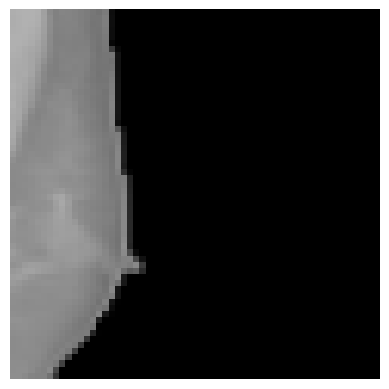

Random Image 2:


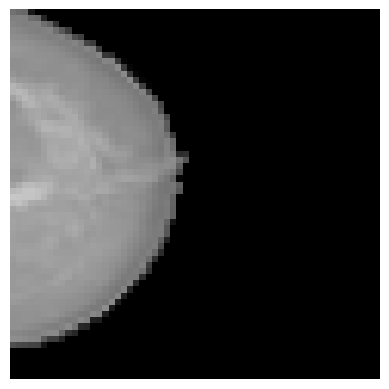

Random Image 3:


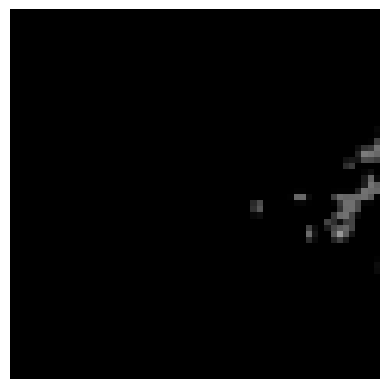

In [ ]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
def resize_and_crop_dataset(folder_path, target_size=(64, 64), crop_size=(60, 60)):
    cropped_images = []

    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            if image_file.endswith('.jpg') or image_file.endswith('.png'):
                image = Image.open(image_path)  # Remove .convert('L') to keep the image in color
                # Resize image to the target size
                resized_image = image.resize(target_size)
                # Crop image
                width, height = resized_image.size
                left = (width - crop_size[0]) // 2
                top = (height - crop_size[1]) // 2
                right = left + crop_size[0]
                bottom = top + crop_size[1]
                cropped_image = resized_image.crop((left, top, right, bottom))

                cropped_images.append(cropped_image)
        except Exception as e:
            print(f"Error processing image: {image_path}, Error: {e}")

    return cropped_images

# Load and preprocess the dataset with adjusted target_size
folder_path = "/content/drive/MyDrive/Project3/SegmentedImages"
cropped_images = resize_and_crop_dataset(folder_path, target_size=(64, 64))

# Check if cropped_images list is not empty
if cropped_images:
    # Print three random images
    random_images = random.sample(cropped_images, min(3, len(cropped_images)))

    for i, image in enumerate(random_images, start=1):
        print(f"Random Image {i}:")
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.show() # Display the image
else:
    print("No images found or images couldn't be loaded properly.")


## GAN Model Building
Generative Adversial Network(GAN) contains two neural networks.Those are **Generator** and **Discriminator**.
Generator generates the images based on the trained dataset and discriminator detects whether the generated image is real or fake.


**Generator**:
In the below generator function contains
*   Encoder :- 2 Conv2D layers(contains Batch Normalization and Leaky Relu Layers).
*   Residual Blocks :-12 Conv2D layers with 2 in a for loop as similar to the encoder.
*   Decoder :- 2Conv2D layers


**Discriminator**:
It contains

*   3 Conv2D layers
*   1 Flatten Layer
*   1 Dense Layer









**Optimizer**

Adam is a popular optimizer for training neural networks because it combines the benefits of two other widely-used optimization algorithms: AdaGrad and RMSProp. Here are some reasons why Adam is commonly used:

Adaptive Learning Rate: Adam adapts the learning rate for each parameter individually, which helps in faster convergence and better performance. It computes adaptive learning rates for each parameter based on the first and second moments of the gradients.

Efficient: Adam efficiently updates the learning rates during training, allowing for faster convergence compared to traditional gradient descent algorithms.

Easy to Use: Adam does not require manual tuning of the learning rate, making it easier to use for a wide range of problems. It typically works well with default hyperparameters.

Robustness: Adam is known to work well across a wide range of deep learning architectures and problem domains. It is robust to noisy gradients and sparse data.

Regularization Effect: Adam has a built-in L2 regularization effect, which helps prevent overfitting to some extent.













In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the generator model
def build_generator(input_shape):
    model = models.Sequential()

    # Encoder
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Residual blocks
    for _ in range(6):
        model.add(layers.Conv2D(128, (3, 3), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Conv2D(128, (3, 3), padding='same'))
        model.add(layers.BatchNormalization())

    # Decoder
    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(1, (3, 3), padding='same', activation='tanh'))

    return model

# Define the discriminator model
def build_discriminator(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Define the input shape for the generator
input_shape = (64, 64, 1)  # Adjust based on your input image size and channels

# Build the generator and discriminator models
generator = build_generator(input_shape)
discriminator = build_discriminator(input_shape)

# Compile the discriminator
discriminator.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Freeze the discriminator's weights during GAN training
discriminator.trainable = False

# Build the GAN model
gan_input = layers.Input(shape=input_shape)
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)

# Compile the GAN model
gan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
            loss='binary_crossentropy')

# Print summary of the models
print("Generator Summary:")
generator.summary()

print("\nDiscriminator Summary:")
discriminator.summary()

print("\nGAN Summary:")
gan.summary()


Generator Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1

## Model Training
After building the GAN model , it is called and then trained on the segmented images

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, optimizers

# Load the segmented images dataset with resizing
def load_segmented_images_dataset(folder_path, target_size=(64, 64)):
    segmented_images = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            image = tf.keras.preprocessing.image.load_img(image_path, color_mode='grayscale', target_size=target_size)
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize pixel values
            segmented_images.append(image)
    return np.array(segmented_images)


# Define the paths to your segmented images dataset
segmented_images_folder = "/content/drive/MyDrive/Project3/SegmentedImages"

# Load the segmented images dataset
segmented_images = load_segmented_images_dataset(segmented_images_folder)

# Define the input shape for the generator
input_shape = segmented_images[0].shape

# Build the generator, discriminator, and GAN models (using the code from the previous steps)
generator = build_generator(input_shape)
discriminator = build_discriminator(input_shape)

# Compile the discriminator
discriminator.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Freeze the discriminator's weights during GAN training
discriminator.trainable = False

# Build the GAN model
gan_input = layers.Input(shape=input_shape)
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)

# Compile the GAN model
gan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
            loss='binary_crossentropy')

# Define the batch size and number of epochs for training
batch_size = 64
epochs = 500  # Adjust as needed

# Define labels for real and fake images
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))

# Start training the GAN model
for epoch in range(epochs):
    # Train the discriminator
    # Sample a batch of real images
    real_images = segmented_images[np.random.randint(0, segmented_images.shape[0], batch_size)]
    # Generate a batch of fake images
    noise = np.random.normal(0, 1, (batch_size, *input_shape))
    generated_images = generator.predict(noise)
    # Train the discriminator with real and fake images
    discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
    discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, *input_shape))
    generator_loss = gan.train_on_batch(noise, real_labels)

    # Print training progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Save the trained generator model
generator.save("/content/drive/MyDrive/Project3/trained_generator_model.h5")


2/2 [==============================] - 3s 1s/step
Epoch 1/500, Discriminator Loss: 0.9328232407569885, Generator Loss: 0.7068131566047668
2/2 [==============================] - 2s 804ms/step
Epoch 2/500, Discriminator Loss: 0.44024303555488586, Generator Loss: 0.6793861389160156
2/2 [==============================] - 1s 645ms/step
Epoch 3/500, Discriminator Loss: 0.485626757144928, Generator Loss: 0.674530029296875
2/2 [==============================] - 1s 658ms/step
Epoch 4/500, Discriminator Loss: 0.4626817852258682, Generator Loss: 0.6986769437789917
2/2 [==============================] - 1s 659ms/step
Epoch 5/500, Discriminator Loss: 0.1362388078123331, Generator Loss: 0.7389070987701416
2/2 [==============================] - 1s 700ms/step
Epoch 6/500, Discriminator Loss: 0.08252217248082161, Generator Loss: 0.7190690040588379
2/2 [==============================] - 2s 948ms/step
Epoch 7/500, Discriminator Loss: 0.10718843713402748, Generator Loss: 0.7343190908432007
2/2 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 500/500, Discriminator Loss: 0.00010848306192201562, Generator Loss: 0.0005429548909887671


## **Minority Selection**
After training the model with segmented images ,we call the model to generate the non tumorous images.The generated images are saved as Generated Images
These are the Generated Images through GAN.
https://drive.google.com/drive/folders/1AzRESPCXzEtT8EPJDlhq1gVqeuo96rN_?usp=drive_link

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained generator model
generator = load_model("/content/drive/MyDrive/Project3/trained_generator_model.h5")

# Generate non-tumorous MRI images
num_images = 60
input_shape = (64, 64, 1)
generated_images = []
for _ in range(num_images):
    noise = np.random.normal(0, 1, (1, *input_shape))
    generated_image = generator.predict(noise)
    generated_images.append(generated_image)

# Convert generated images to numpy array
generated_images = np.array(generated_images)

# Create a folder to save the generated images
output_folder = "/content/drive/MyDrive/Project3/GeneratedImages"
os.makedirs(output_folder, exist_ok=True)

# Save the generated images in the output folder
for i, image in enumerate(generated_images):
    output_path = os.path.join(output_folder, f"generated_image_{i+1}.png")
    tf.keras.preprocessing.image.save_img(output_path, image[0])  # Selecting the first element to remove extra dimension

print("Generated images saved successfully.")

1/1 [==============================] - 0s 59ms/step
Generated images saved successfully.


## **Augmentation of Dataset**
Combining the actual segmented images dataset and the generated images dataset to balance the dataset

In [ ]:
import os
import numpy as np
from PIL import Image

# Define the paths to segmented and generated images folders
segmented_images_folder = "/content/drive/MyDrive/Project3/SegmentedImages"
generated_images_folder = "/content/drive/MyDrive/Project3/GeneratedImages"

# Load segmented images
segmented_images = []
for image_file in os.listdir(segmented_images_folder):
    image_path = os.path.join(segmented_images_folder, image_file)
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize((64, 64))  # Resize images to a consistent size
    image_array = np.array(image) / 255.0  # Normalize pixel values
    segmented_images.append(image_array)

segmented_images = np.array(segmented_images)

# Load generated non-tumorous images
generated_images = []
for image_file in os.listdir(generated_images_folder):
    image_path = os.path.join(generated_images_folder, image_file)
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize((64, 64))  # Resize images to a consistent size
    image_array = np.array(image) / 255.0  # Normalize pixel values
    generated_images.append(image_array)

generated_images = np.array(generated_images)

# Combine the segmented and generated images
combined_images = np.concatenate((segmented_images, generated_images), axis=0)

# Shuffle the combined dataset to ensure randomness
np.random.shuffle(combined_images)

# Print the shape of the combined dataset
print("Shape of combined dataset:", combined_images.shape)
# Now you can save the preprocessed images if needed
output_folder = "/content/drive/MyDrive/Project3/CombinedDataset"

## **VAE Model Building and VAE Model Training**
Model Building and training the model on augmented dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

# Define the VAE architecture
latent_dim = 128
input_shape = (64, 64, 1)  # Assuming this is the shape of your input images

# Encoder
encoder_inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim),
                                              mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 128, activation='relu')(decoder_inputs)  # Adjust shape based on desired output shape
x = layers.Reshape((8, 8, 128))(x)  # Adjust shape based on desired output shape
x = layers.Conv2DTranspose(128, (3, 3), activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')
outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Resize input images to match decoder output dimensions
resized_inputs = tf.image.resize(encoder_inputs, (32, 32))

# Define the loss function for VAE
reconstruction_loss = losses.mean_squared_error(resized_inputs, outputs)
kl_loss = -0.5 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compile the VAE model
vae.compile(optimizer='adam')

# Prepare the combined dataset
combined_dataset = np.concatenate((segmented_images, generated_images), axis=0)

# Shuffle the combined dataset
np.random.shuffle(combined_dataset)

# Train the VAE model on the combined dataset
vae.fit(combined_dataset, epochs=100, batch_size=32)

# Save the trained VAE model
vae.save("/content/drive/MyDrive/Project3/trained_vae_model.h5")


Epoch 1/100
5/5 [==============================] - 4s 500ms/step - loss: 0.2168
Epoch 2/100
5/5 [==============================] - 2s 468ms/step - loss: 0.1878
Epoch 3/100
5/5 [==============================] - 3s 532ms/step - loss: 0.1853
Epoch 4/100
5/5 [==============================] - 4s 811ms/step - loss: 0.1851
Epoch 5/100
5/5 [==============================] - 3s 493ms/step - loss: 0.1848
Epoch 6/100
5/5 [==============================] - 2s 477ms/step - loss: 0.1839
Epoch 7/100
5/5 [==============================] - 3s 523ms/step - loss: 0.1840
Epoch 8/100
5/5 [==============================] - 3s 524ms/step - loss: 0.1829
Epoch 9/100
5/5 [==============================] - 4s 815ms/step - loss: 0.1778
Epoch 10/100
5/5 [==============================] - 3s 512ms/step - loss: 0.1621
Epoch 11/100
5/5 [==============================] - 3s 518ms/step - loss: 0.1449
Epoch 12/100
5/5 [==============================] - 3s 521ms/step - loss: 0.1347
Epoch 13/100
5/5 [===================

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained VAE model
vae = load_model("/content/drive/MyDrive/Project3/trained_vae_model.h5")

# Select a random image from the combined dataset
random_index = np.random.randint(0, combined_images.shape[0])
random_image = combined_images[random_index]

# Reshape the image to match the model input shape if necessary
# random_image = np.expand_dims(random_image, axis=0)  # Uncomment if needed

# Generate prediction using the VAE model
prediction = vae.predict(random_image.reshape(1, 64, 64, 1))

# Plot the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title("Original Image")

# Plot the reconstructed image (prediction)
plt.subplot(1, 2, 2)
plt.imshow(prediction.squeeze(), cmap='gray')
plt.title("Reconstructed Image")

plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image

# Define the paths to segmented and generated images folders
segmented_images_folder = "/content/drive/MyDrive/Project3/SegmentedImages"
generated_images_folder = "/content/drive/MyDrive/Project3/GeneratedImages"
combined_dataset_folder = "/content/drive/MyDrive/Project3/CombinedDataset"

# Ensure the combined dataset folder exists, if not, create it
if not os.path.exists(combined_dataset_folder):
    os.makedirs(combined_dataset_folder)

# Load segmented images
segmented_images = []
for image_file in os.listdir(segmented_images_folder):
    image_path = os.path.join(segmented_images_folder, image_file)
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize((64, 64))  # Resize images to a consistent size
    image_array = np.array(image) / 255.0  # Normalize pixel values
    segmented_images.append(image_array)

segmented_images = np.array(segmented_images)

# Load generated non-tumorous images
generated_images = []
for image_file in os.listdir(generated_images_folder):
    image_path = os.path.join(generated_images_folder, image_file)
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize((64, 64))  # Resize images to a consistent size
    image_array = np.array(image) / 255.0  # Normalize pixel values
    generated_images.append(image_array)

generated_images = np.array(generated_images)

# Combine the segmented and generated images
combined_images = np.concatenate((segmented_images, generated_images), axis=0)

# Shuffle the combined dataset to ensure randomness
np.random.shuffle(combined_images)

# Save the combined dataset images in the CombinedDataset folder
for i, image in enumerate(combined_images):
    image_save_path = os.path.join(combined_dataset_folder, f"combined_image_{i}.png")
    image = (image * 255).astype(np.uint8)  # Convert back to uint8 before saving
    Image.fromarray(image).save(image_save_path)

print("Combined dataset images saved in folder:", combined_dataset_folder)


In [ ]:
import os
import numpy as np
from PIL import Image

from tensorflow.keras import models
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to generate Grad-CAM heatmap
def generate_grad_cam(model, img_array, layer_name):
    # Convert the NumPy array to a TensorFlow tensor
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Get the model prediction
    preds = model.predict(img_tensor)
    class_idx = np.argmax(preds[0])

    # Get the output of the last convolutional layer
    last_conv_layer = model.get_layer(layer_name)
    last_conv_layer_model = models.Model(model.inputs, last_conv_layer.output)

    # Compute gradients of the predicted class with regard to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img_tensor)
        target_class_output = last_conv_layer_output[:, class_idx]
    grads = tape.gradient(target_class_output, last_conv_layer_output)

    # Compute the importance of each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_mean(last_conv_layer_output * pooled_grads[..., tf.newaxis], axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def detect_tumors(image, image_path, vae_model):
    # Load the image
    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((64, 64))  # Resize the image to match the VAE input size

    # Convert image to numpy array and normalize
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Reconstruct the image and compute reconstruction error
    reconstructed_image = vae_model.predict(img_array)
    reconstructed_image = reconstructed_image.squeeze(axis=0)  # Remove batch dimension

    # Compute features indicative of tumors
    average_intensity = np.mean(reconstructed_image)
    variance = np.var(reconstructed_image)
    print("Average Intensity:", average_intensity)
    print("Variance:", variance)

    intensity_threshold_tumor = 0.25
    variance_threshold_tumor = 0.05

            # Adjusted thresholds for non-tumor classification
    intensity_threshold_non_tumor = 0.2
    variance_threshold_non_tumor = 0.03

    if average_intensity > intensity_threshold_tumor and variance > variance_threshold_tumor:
            return "Tumorous image detected."
    elif average_intensity < intensity_threshold_non_tumor and variance < variance_threshold_non_tumor:
                return "Non-tumorous image detected."

# Load the trained VAE model
vae_model = models.load_model("/content/drive/MyDrive/Project3/trained_vae_model.h5")

# Load the combined dataset folder
combined_dataset_folder = "/content/drive/MyDrive/Project3/CombinedDataset"

# Randomly select an image from the combined dataset for testing
random_image_name = np.random.choice(os.listdir(combined_dataset_folder))
random_image_path = os.path.join(combined_dataset_folder, random_image_name)
random_image = np.array(Image.open(random_image_path))

# Detect tumors in the randomly selected image
detect_tumors(random_image, random_image_path, vae_model)


1/1 [==============================] - 0s 347ms/step
Average Intensity: 0.84198576
Variance: 0.02193873
Tumorous image detected.


1/1 [==============================] - 0s 214ms/step
Normalized Average Intensity: 3.066101471583049
Normalized Variance: 0.15391224063932896
Tumorous image detected.


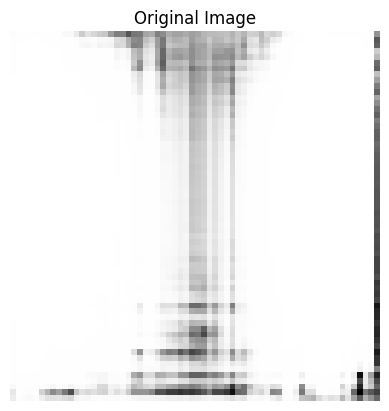

In [ ]:
def detect_tumors(image, image_path, vae_model):
    # Load the image
    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((64, 64))  # Resize the image to match the VAE input size

    # Convert image to numpy array and normalize
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Reconstruct the image and compute reconstruction error
    reconstructed_image = vae_model.predict(img_array)
    reconstructed_image = reconstructed_image.squeeze(axis=0)  # Remove batch dimension

    # Compute features indicative of tumors
    average_intensity = np.mean(reconstructed_image)
    variance = np.var(reconstructed_image)

    # Normalize the variables
    average_intensity /= 0.3  # Scale to range [0, 1]
    variance /= 0.1  # Scale to range [0, 1]

    print("Normalized Average Intensity:", average_intensity)
    print("Normalized Variance:", variance)

    intensity_threshold_tumor = 0.25
    variance_threshold_tumor = 0.05

    # Adjusted thresholds for non-tumor classification
    intensity_threshold_non_tumor = 0.2
    variance_threshold_non_tumor = 0.03

    if average_intensity > intensity_threshold_tumor and variance > variance_threshold_tumor:
            return "Tumorous image detected."
    elif average_intensity < intensity_threshold_non_tumor and variance < variance_threshold_non_tumor:
            return "Non-tumorous image detected."

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

# Load the trained VAE model
vae_model = models.load_model("/content/drive/MyDrive/Project3/trained_vae_model.h5")

# Load the combined dataset folder
combined_dataset_folder = "/content/drive/MyDrive/Project3/CombinedDataset"

# Randomly select an image from the combined dataset for testing
random_image_name = np.random.choice(os.listdir(combined_dataset_folder))
random_image_path = os.path.join(combined_dataset_folder, random_image_name)
random_image = np.array(Image.open(random_image_path))

# Detect tumors in the randomly selected image
detect_tumors(random_image, random_image_path, vae_model)
